In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [3]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


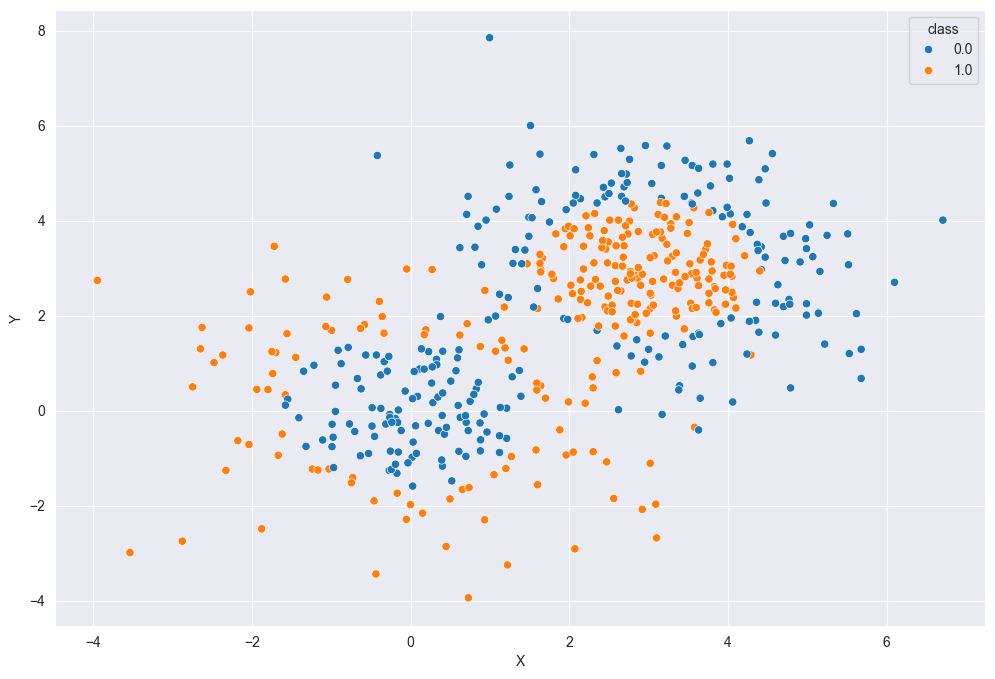

In [4]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

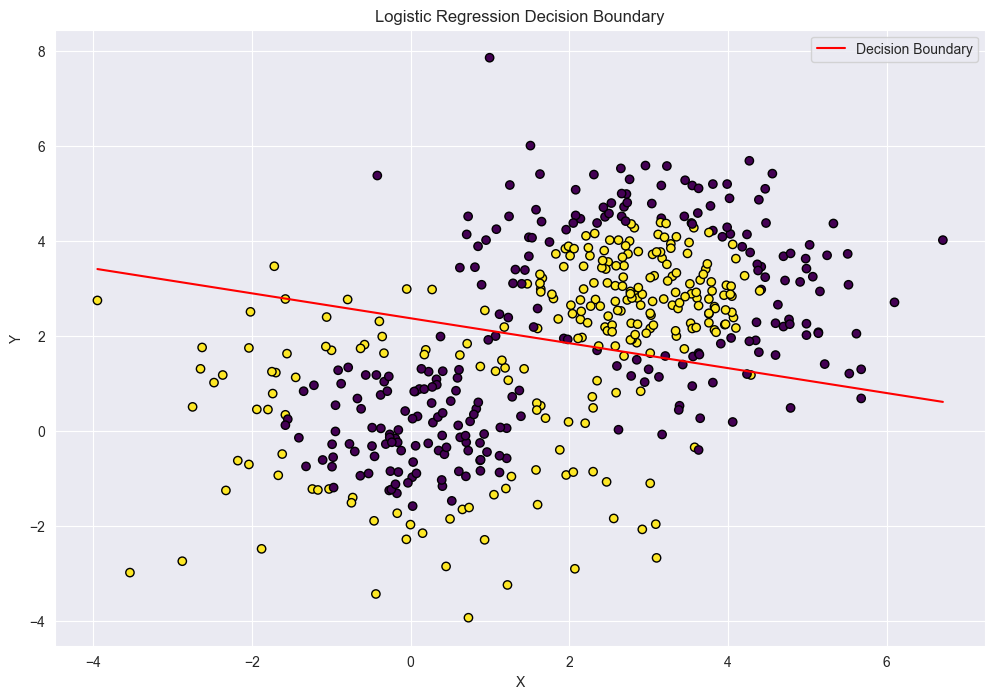

In [5]:
from sklearn.linear_model import LogisticRegression

### Your code is here
X = circ.drop(columns=['class'])
y = circ['class']
lr = LogisticRegression()

lr.fit(X, y)
lr.score(X, y)

# Extract the coefficients
w1, w2 = lr.coef_[0]
w0 = lr.intercept_[0]

# Calculate the slope (m) and intercept (c) of the decision boundary
m = -w1 / w2
c = -w0 / w2

# Plot the decision boundary
x_values = np.linspace(X['X'].min(), X['X'].max(), 100)
y_values = m * x_values + c
plt.plot(x_values, y_values, color='red', label='Decision Boundary')

# Plot the data points
plt.scatter(X['X'], X['Y'], c=y, cmap='viridis', edgecolor='k')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [6]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

all_clf = []
### Your code is here
for k in all_k:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    all_clf.append(KNN.fit(X_train, y_train))
    train_accuracy = KNN.score(X_train, y_train)
    test_accuracy = KNN.score(X_test, y_test)
    
    print("neighbor {} train accuracy {} test accuracy {}".format(k, train_accuracy, test_accuracy))


neighbor 1 train accuracy 1.0 test accuracy 0.89
neighbor 3 train accuracy 0.9475 test accuracy 0.87
neighbor 10 train accuracy 0.915 test accuracy 0.85
neighbor 30 train accuracy 0.8525 test accuracy 0.74
neighbor 40 train accuracy 0.8 test accuracy 0.75
neighbor 60 train accuracy 0.6925 test accuracy 0.73


In [9]:
all_clf

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=30),
 KNeighborsClassifier(n_neighbors=40),
 KNeighborsClassifier(n_neighbors=60)]

**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [10]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

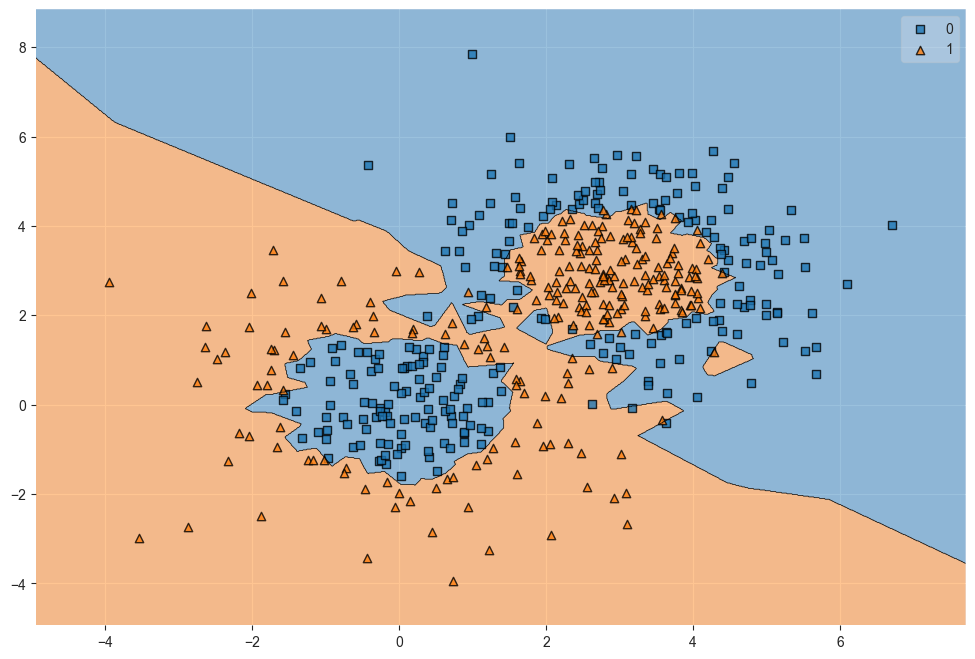

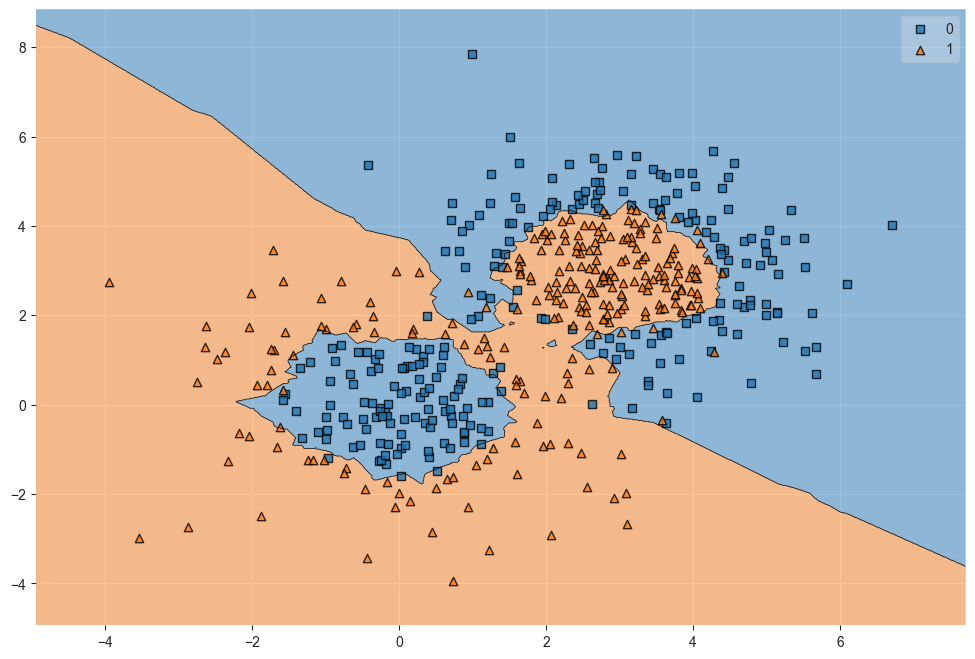

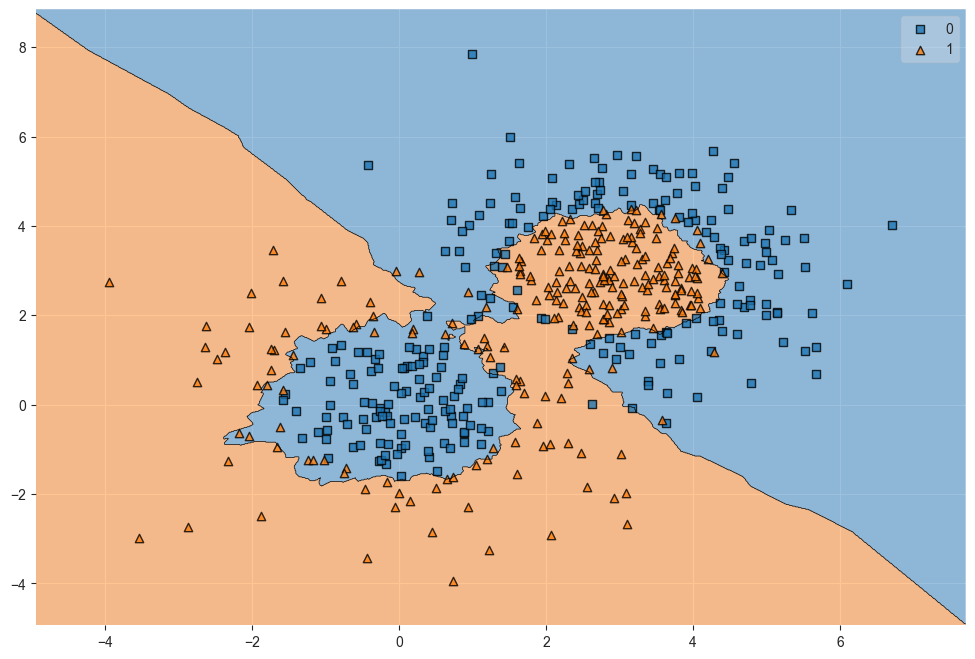

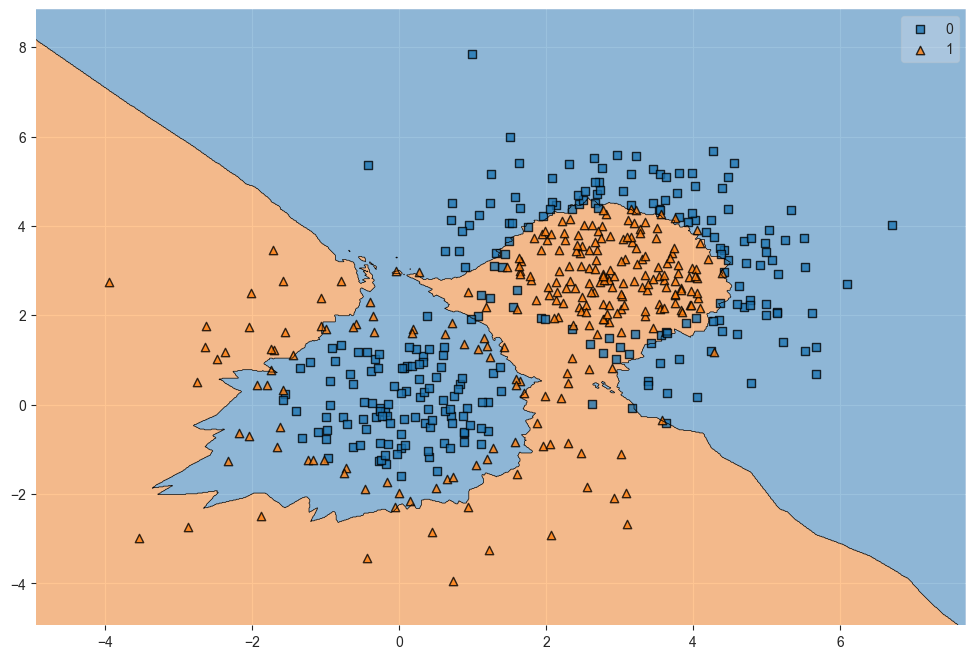

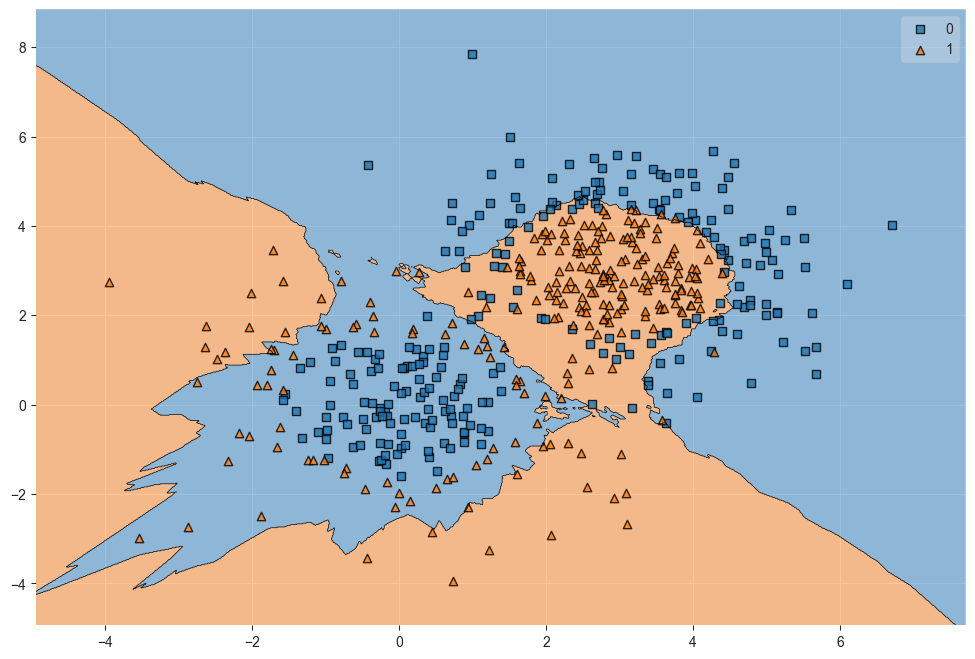

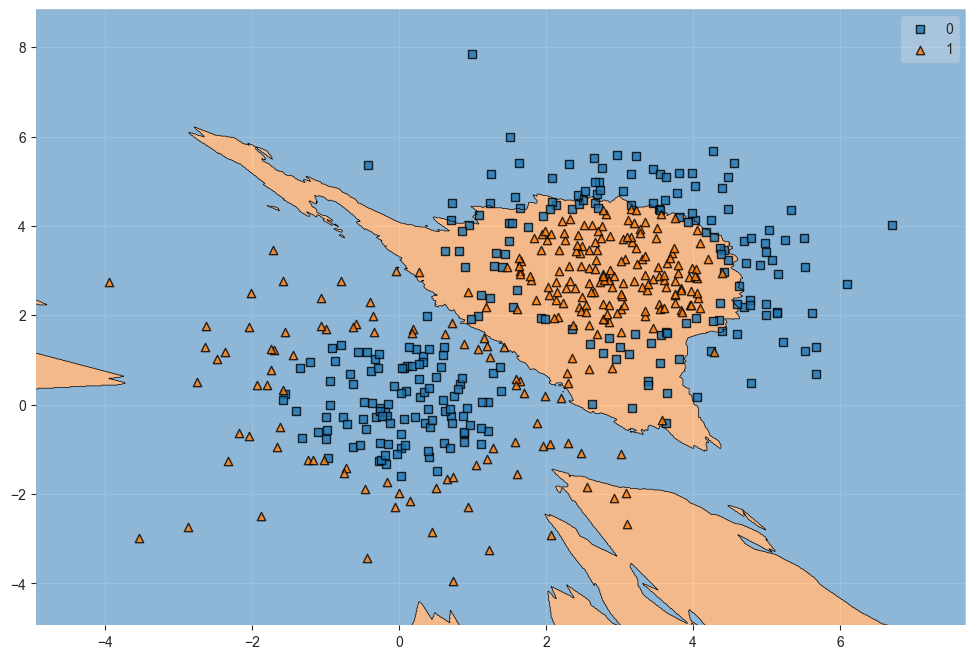

In [11]:
### Your code is here
for clf in all_clf:
    plot_decision_regions(X, y, clf=clf)
    plt.show()



1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [12]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [14]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
all_k = [1, 5, 10]

for k in all_k:
    pipe_with_scaler = Pipeline([('scaler', StandardScaler()),
                                 ('knn', KNeighborsClassifier(n_neighbors=k))])
    
    pipe_with_scaler.fit(X_train, y_train)
    test_accuracy_scaler = pipe_with_scaler.score(X_test, y_test)
    
    pipe_no_scaler = Pipeline([('knn', KNeighborsClassifier(n_neighbors=k))])
    pipe_no_scaler.fit(X_train, y_train)
    test_accuracy_no_scaler = pipe_no_scaler.score(X_test, y_test)
    
    print(f'k: {k}; No scaler: {test_accuracy_no_scaler}; With scaler: {test_accuracy_scaler}')








k: 1; No scaler: 0.43819542019519236; With scaler: 0.5648805681084571
k: 5; No scaler: 0.44317016671097104; With scaler: 0.6303877264269168
k: 10; No scaler: 0.4703603843086621; With scaler: 0.6607678578209851


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [15]:
### Your code is here
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)



0.6611476094634109

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [16]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


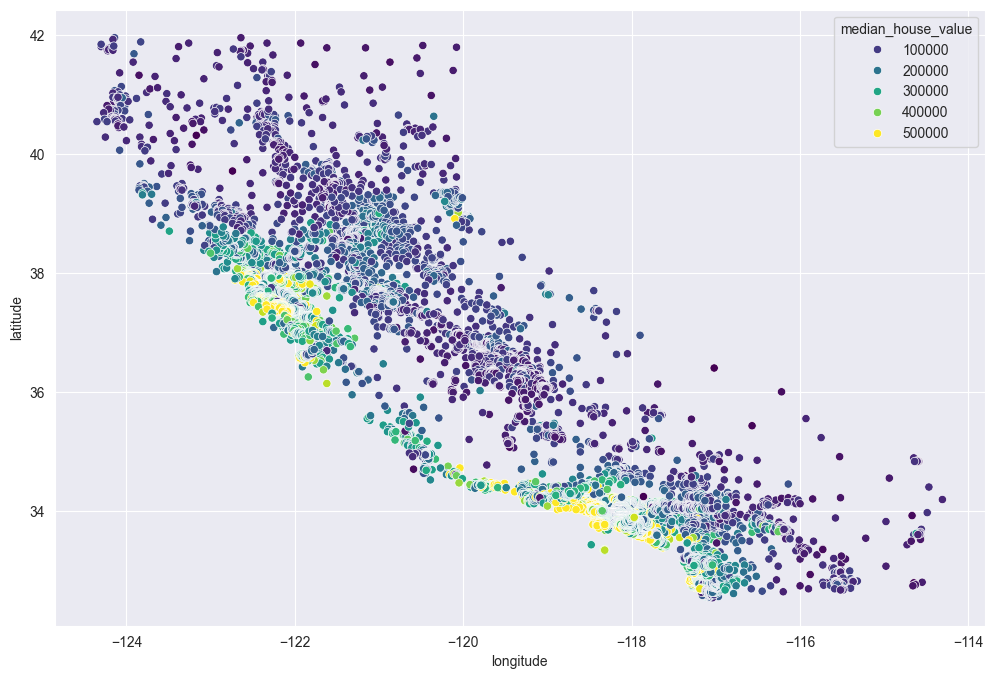

In [17]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(data=X, x='longitude', y='latitude', hue=y, palette='viridis');

In [18]:
### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

pipe = Pipeline([('scaler', StandardScaler()),('lr', LinearRegression())])
pipe.fit(X_train, y_train)
print(f'LR: RMSE train: {np.sqrt(mean_squared_error(y_train, pipe.predict(X_train)))}')
print(f'LR: RMSE test: {np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))}')



LR: RMSE train: 100948.39976676002
LR: RMSE test: 98369.87709657701


In [19]:
from sklearn.neighbors import KNeighborsRegressor
all_k = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for k in all_k:
    pipe = Pipeline([('scaler', StandardScaler()),('knn', KNeighborsRegressor(n_neighbors=k))])
    pipe.fit(X_train, y_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))
    rmse_train = np.sqrt(mean_squared_error(y_train, pipe.predict(X_train)))
    
    print(f'k={k}; RMSE train: {rmse_train}; test: {rmse_test}')



k=1; RMSE train: 34341.0137547383; test: 63820.256944023364
k=2; RMSE train: 35791.50421485477; test: 56085.15820072522
k=3; RMSE train: 38663.29383161384; test: 54120.94561778437
k=4; RMSE train: 41145.703156649375; test: 53717.63862737469
k=5; RMSE train: 42761.14967654504; test: 52875.11551384023
k=6; RMSE train: 44112.69528160438; test: 52835.46864512489
k=7; RMSE train: 45117.05424094893; test: 52636.81501200042
k=8; RMSE train: 45913.94890085015; test: 52798.72099268552
k=9; RMSE train: 46757.64733777607; test: 53083.729615514254


In [26]:
# k=7 

h_list = np.arange(0.02, 0.1, 0.01)




for h in h_list:
    def kernel(distances, h=h):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
        return const * np.exp(power)
    
    
    pipe = Pipeline([('scaler', StandardScaler()),
                     ('knn', KNeighborsRegressor(n_neighbors=7, weights=kernel))])
    pipe.fit(X_train, y_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))
    rmse_train = np.sqrt(mean_squared_error(y_train, pipe.predict(X_train)))
    
    print(f'h={h}; RMSE train: {rmse_train}; test: {rmse_test}')

h=0.02; RMSE train: 42953.4254581204; test: 52472.60940554383
h=0.03; RMSE train: 43852.45116606268; test: 52478.4644592844
h=0.039999999999999994; RMSE train: 44267.3112658029; test: 52516.509896402975
h=0.049999999999999996; RMSE train: 44493.708923275255; test: 52541.9633579834
h=0.06; RMSE train: 44641.93410461804; test: 52559.049082895544
h=0.06999999999999999; RMSE train: 44750.54416755313; test: 52572.32884678634
h=0.07999999999999999; RMSE train: 44830.58404495504; test: 52582.967725493116
h=0.09; RMSE train: 44889.10778522433; test: 52591.426806134485
